## Import Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',500)
import warnings  
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np

## Import Dataset:

In [2]:
order_history = pd.read_csv(r"D:\DATA ANALYSIS\Practice Projects\Inventory analysis\order_history.csv")
stock = pd.read_csv(r"D:\DATA ANALYSIS\Practice Projects\Inventory analysis\stock.csv")

## Data Manipulation:

In [3]:
order_history.head()

,Order Date,SKU ID,Order Quantity
0,21-07-2022,2418CA,111770.0
1,22-08-2022,2483BA,88200.0
2,05-05-2022,2391CA,80574.0
3,17-03-2023,2473CA,69415.0
4,19-01-2023,2396CA,62000.0


In [4]:
stock.head()

,SKU ID,Current Stock Quantity,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price
0,1009AA,7210.0,Kg,30,48,28.76326
1,1077CA,46516.0,Kg,45,70,22.97770
2,1083AA,48210.0,Kg,45,68,29.02000
3,1116CA,33398.0,Kg,90,140,32.80000
4,1126CA,39270.0,Kg,45,62,32.80000


In [5]:
# Join two dataset based on the SKU ID
new_df=order_history.merge(stock,on = 'SKU ID',how = 'inner')

In [6]:
new_df.head()

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price
0,21-07-2022,2418CA,111770.00000,120860.0,Kg,60,85,5.8
1,06-01-2023,2418CA,17810.98366,120860.0,Kg,60,85,5.8
2,28-09-2022,2418CA,17721.53196,120860.0,Kg,60,85,5.8
3,08-04-2023,2418CA,17569.55249,120860.0,Kg,60,85,5.8
4,07-01-2023,2418CA,17511.38021,120860.0,Kg,60,85,5.8


In [7]:
new_df.shape

(33919, 8)

In [8]:
new_df.isnull().sum()

Order Date                  0
SKU ID                      0
Order Quantity              0
Current Stock Quantity      0
Units (Nos/Kg)              0
Average Lead Time (days)    0
Maximum Lead Time (days)    0
Unit Price                  0
dtype: int64

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33919 entries, 0 to 33918
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order Date                33919 non-null  object 
 1   SKU ID                    33919 non-null  object 
 2   Order Quantity            33919 non-null  float64
 3   Current Stock Quantity    33919 non-null  float64
 4   Units (Nos/Kg)            33919 non-null  object 
 5   Average Lead Time (days)  33919 non-null  int64  
 6   Maximum Lead Time (days)  33919 non-null  int64  
 7   Unit Price                33919 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 2.3+ MB


In [10]:
# Convert 'Order Date' column to datetime
new_df['Order Date'] = pd.to_datetime(new_df['Order Date'])

### Duplicated Values Explanation:

- The dataset initially showed 320 entries flagged as duplicated.
- Upon reviewing the DataFrame rows, it was observed that these entries aren't considered duplicates.
- Reasoning behind this includes the transactions being identical but with differing order dates.
- Each entry represents a distinct transaction despite similarities in other attributes.
- Therefore, these entries, although appearing similar, are not considered duplicates based on the contextual significance of differing order dates.

In [11]:
new_df.duplicated().sum()

320

In [12]:
# Inspecting rows visually
new_df[new_df.duplicated()].head()

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price
985,2023-04-22,3533CA,1000.0,82476.0,Kg,40,64,0.64377
1623,2023-08-02,3461CA,5.0,177.0,Kg,15,23,30.06400
1661,2022-02-23,3461CA,3.0,177.0,Kg,15,23,30.06400
1673,2023-10-01,3461CA,2.0,177.0,Kg,15,23,30.06400
1696,2022-04-15,3461CA,1.0,177.0,Kg,15,23,30.06400


In [13]:
# Cheking Number Of Unique SKU
total_sku=new_df['SKU ID'].nunique()
print('Total SKU:',total_sku)

Total SKU: 290


## Statistical Summary:

## Insights:

- The data ranges for 'Order Quantity' and 'Current Stock Quantity' show a wide variability.
- 'Unit Price' has a significantly high standard deviation, suggesting considerable variability in pricing.
- The lead times show moderate variability, with average lead time centered around 49.14 days.

In [14]:
new_df.describe()

,Order Quantity,Current Stock Quantity,Average Lead Time (days),Maximum Lead Time (days),Unit Price
count,33919.000000,33919.000000,33919.000000,33919.000000,33919.000000
mean,432.793196,6512.076261,49.140894,71.515611,4659.335657
std,2382.904837,20959.970639,29.304755,42.386331,20140.347333
min,0.000015,0.000000,15.000000,20.000000,0.102950
25%,2.000000,17.000000,30.000000,42.000000,30.000000
50%,6.000000,218.000000,45.000000,63.000000,73.000000
75%,36.294959,1565.000000,60.000000,91.000000,740.820000
max,111770.000000,342553.000000,120.000000,192.000000,175000.000000


##### Strong positive correlation (values closer to 1):

- Order Quantity and Current Stock Quantity have a relatively strong positive correlation (0.512249).
- Average Lead Time and Maximum Lead Time also exhibit a strong positive correlation (0.991660).

##### Weak correlations (values closer to 0):

- Order Quantity and Average Lead Time or Maximum Lead Time'have relatively weak positive correlations (0.026115 and 0.033360, respectively).
- Current Stock Quantity and Average Lead Time or Maximum Lead Time also display relatively weak positive correlations (0.030141 and 0.039341, respectively).
- Order Quantity and Unit Price show a weak negative correlation (-0.041703).
- Current Stock Quantity and Unit Price display a weak negative correlation (-0.071328).
######
- It's important to note that correlation does not imply causation, and a correlation close to 1 or -1 does not necessarily mean a cause-and-effect relationship. It only signifies the strength and direction of the linear relationship between variables. Additionally, correlations might not capture complex or non-linear relationships between the variables.

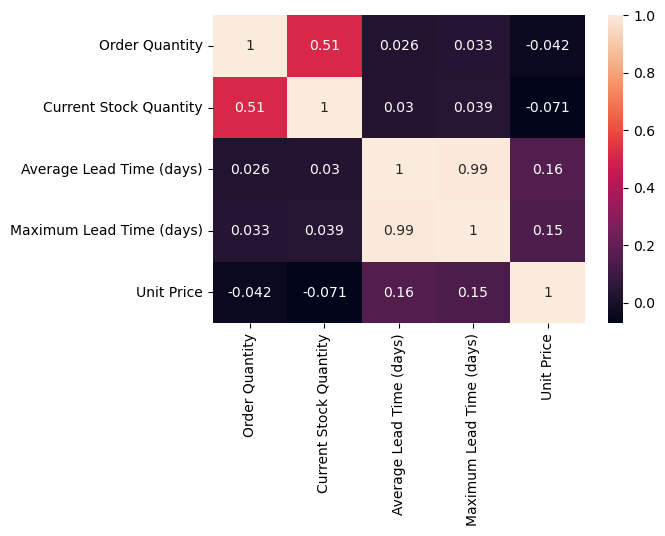

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(new_df.corr(),annot = True);

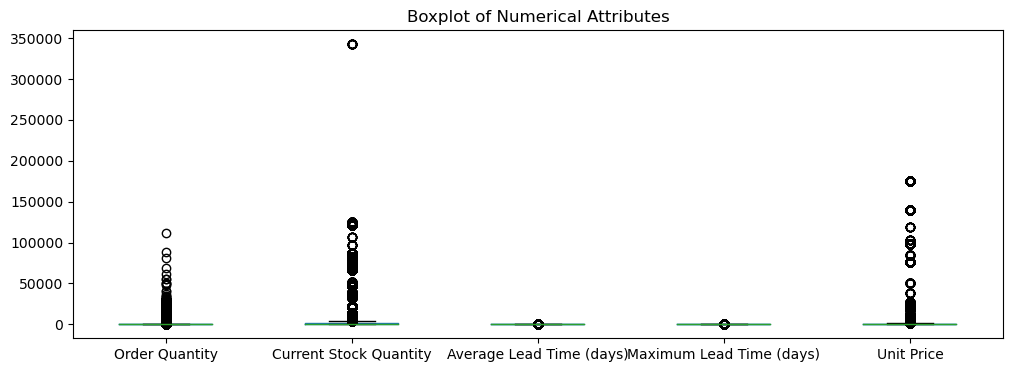

In [16]:
plt.figure(figsize=(12,4))
new_df.boxplot(column=['Order Quantity', 'Current Stock Quantity', 'Average Lead Time (days)', 'Maximum Lead Time (days)', 'Unit Price'])
plt.title('Boxplot of Numerical Attributes')
plt.grid(False)
plt.show()

## ABC Analysis:
- Certainly! ABC analysis is a technique used in inventory management to categorize items based on their importance. It classifies items into three categories: A, B, and C, with A being the most valuable or important and C being the least. The categorization is typically based on criteria like value, usage, or other important factors.

In [17]:
new_df['active_inventory_cost'] = new_df['Current Stock Quantity'] * new_df['Unit Price']

new_df.sort_values(by=['active_inventory_cost'],ascending = False, inplace = True)

new_df['cumulative_cost'] = new_df['active_inventory_cost'].cumsum()

new_df['total_cost'] = new_df['active_inventory_cost'].sum()

new_df['cumulative_percentage'] = new_df['cumulative_cost'] / new_df['total_cost']

In [18]:
new_df.head()

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price,active_inventory_cost,cumulative_cost,total_cost,cumulative_percentage
7964,2022-05-08,2766AA,25.0,7502.0,Kg,90,126,363.83238,2.729471e+06,2.729471e+06,7.877493e+09,0.000346
7951,2022-06-13,2766AA,128.0,7502.0,Kg,90,126,363.83238,2.729471e+06,5.458941e+06,7.877493e+09,0.000693
7953,2022-06-17,2766AA,118.0,7502.0,Kg,90,126,363.83238,2.729471e+06,8.188412e+06,7.877493e+09,0.001039
7954,2023-05-29,2766AA,80.0,7502.0,Kg,90,126,363.83238,2.729471e+06,1.091788e+07,7.877493e+09,0.001386
7955,2022-03-25,2766AA,71.0,7502.0,Kg,90,126,363.83238,2.729471e+06,1.364735e+07,7.877493e+09,0.001732


__Categories inventory products into 3 classes A, B, and C based on cum_percentage distribution__
<br>
- A Class holds 70 % of inventory cost.
- B Class holds 20 % of inventory cost.
- C Class holds 10 % of inventory cost.

In [19]:
new_df['class'] ='C'
new_df.loc[new_df['cumulative_percentage']<= 0.70,'class'] = 'A'
new_df.loc[(new_df['cumulative_percentage']> 0.70) & (new_df['cumulative_percentage']<= 0.90),'class']  ='B'

- The distribution of items across the classes indicates that a larger portion of inventory product falls into the 'C' category, which are typically less critical or lower-value items. Where a smaller proportion of items are categorized as 'A', representing the most critical and valuable items, while 'C' represents the least critical or low-value items.

In [20]:
new_df['class'].value_counts()

C    24178
B     5026
A     4715
Name: class, dtype: int64

## Insights:

- The highest cost is attributed to Class A items, which represent approximately 70% of the total cost. While they contribute significantly to the cost, they don't constitute the largest share in quantity.
<br>

- Class A items represent around 37.6% of the total quantity, while Class C represents a similar quantity share at around 37.49%. Class B items are slightly lower, around 24.96%.
<br>

- The management focus should primarily be on Class A items due to their significant cost impact, despite not constituting the largest quantity share. Optimizing, monitoring, and efficiently managing Class A items can yield substantial cost-saving benefits.
<br>

| Class | Total SKUs | Total Cost ($) | Quantity Percentage | Cost Percentage |
|-------|------------|----------------|---------------------|-----------------|
| A     | 4715       | 5,513,932,007.89| 37.60%              | 69.99%          |
| B     | 5026       | 1,575,717,472.34| 24.96%              | 20.00%          |
| C     | 24178      |   787,843,518.18| 37.49%              | 10.01%          |
| Total | 33919      | 7,877,493,998.41| 100.00%             | 100.00%         |


In [21]:
# Total cost holding by each class
print('Class A Cost:',new_df[new_df['class']=='A']['active_inventory_cost'].sum())
print('Class B Cost:',new_df[new_df['class']=='B']['active_inventory_cost'].sum())
print('Class C Cost:',new_df[new_df['class']=='C']['active_inventory_cost'].sum())

Class A Cost: 5513932007.893688
Class B Cost: 1575717472.344418
Class C Cost: 787843518.1835439


In [22]:
# Total cost holding by each class in percentage
print('Class A Cost:',new_df[new_df['class']=='A']['active_inventory_cost'].sum()/new_df['active_inventory_cost'].sum())
print('Class B Cost:',new_df[new_df['class']=='B']['active_inventory_cost'].sum()/new_df['active_inventory_cost'].sum())
print('Class C Cost:',new_df[new_df['class']=='C']['active_inventory_cost'].sum()/new_df['active_inventory_cost'].sum())

Class A Cost: 0.6999602549946372
Class B Cost: 0.20002778455787035
Class C Cost: 0.10001196044749233


In [23]:
# Total quantity holding by each class
print('Class A Quantity:',new_df[new_df['class']=='A']['Current Stock Quantity'].sum()/new_df['Current Stock Quantity'].sum())
print('Class B Quantity:',new_df[new_df['class']=='B']['Current Stock Quantity'].sum()/new_df['Current Stock Quantity'].sum())
print('Class C Quantity:',new_df[new_df['class']=='C']['Current Stock Quantity'].sum()/new_df['Current Stock Quantity'].sum())

Class A Quantity: 0.3755181117687996
Class B Quantity: 0.24956219907241114
Class C Quantity: 0.3749196891587892


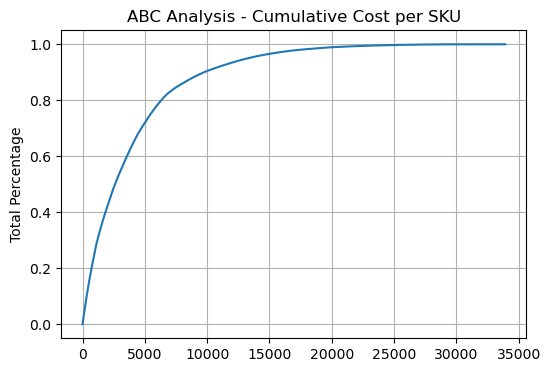

In [24]:
x_port = new_df['cumulative_percentage'].tolist()
y_port = np.arange(len(x_port))

plt.figure(figsize=(6,4))
plt.plot(y_port, x_port)
plt.ylabel('Total Percentage')
plt.title('ABC Analysis - Cumulative Cost per SKU')
plt.grid(True)
plt.show()